### <b>Module 1 Exam - Jeremiah Pagan </b>
***
Load the image "Input.png". Using OpenCV, NumPy, and Matplotlib, construct a processing pipeline to generate a masked image resembling "Output.png". You're free to reference any class materials or notes for assistance.

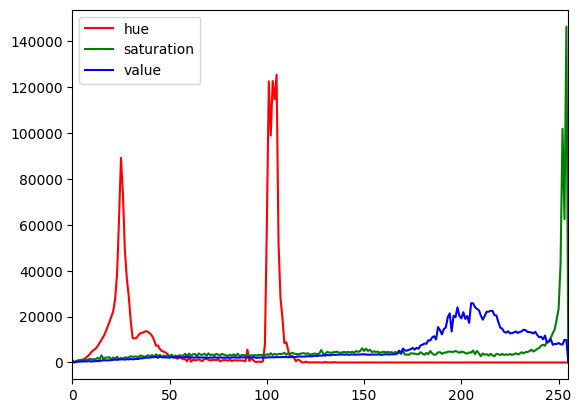

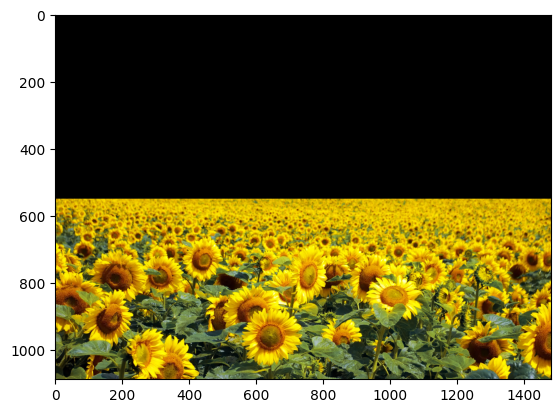

In [30]:
#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('../images/Input.png')

#OpenCV by defualt uses BGR instead of RGB.  Old digital camera standard.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

#Create an empty 2D array filled with zeros the same shape as our image.  Notice we are defining the data type as uint8 now!
mask = np.zeros(img.shape[:2], np.uint8) 

# Set the masked to white. Remember black is 0 and white is 255 is 8 bit color.
mask[550:1100, 0:1500] = 255

# Plot mask. Make sure you tell matplotlib that you it only contains gray values.  
plt.imshow(mask, cmap="gray")

# Let's add our mask to our image.

# Import the face image again.
img = cv2.imread("../images/Input.png")

# Convert our image to RGB so we can plot it.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)

